In [123]:
## analyze time usage google sheet

In [1]:
import sys
print(sys.version)
print(sys.executable)
%matplotlib inline

3.5.4 |Anaconda, Inc.| (default, Oct  5 2017, 02:58:14) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
/Users/cswitzer/anaconda/envs/p35/bin/python


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
test = pd.read_csv('https://docs.google.com/spreadsheets/d/' + 
                   '1OPPbkBkkBJf5_TRd_TWioTfNZtfDlUlQiDoCfRpzdoI' +
                   '/export?gid=0&format=csv'
                  )
test.head(5)  #

,day,hour,category,productive,notes
0,2 Oct 2017,06:00,get ready,n,NaN
1,NaN,07:15,commute,n,NaN
2,NaN,07:30,exercise,n,NaN
3,NaN,08:15,maintenance,n,Trying to get title for my car
4,NaN,09:26,eScience,y,prep lightning talk


In [4]:
# %qtconsole

In [5]:
def cellFillBelow(dataframe, column):
    #loop through cells
    tmp = dataframe[column].copy()
    
    currInfo = tmp[0]
    for ii in range(len(tmp)):
        if pd.isnull(tmp[ii]):
            tmp[ii] = currInfo
        else:
            currInfo = tmp[ii]
    
    return(tmp)

In [6]:
test['day'] = cellFillBelow(test, 'day')

In [7]:
test.head()

,day,hour,category,productive,notes
0,2 Oct 2017,06:00,get ready,n,NaN
1,2 Oct 2017,07:15,commute,n,NaN
2,2 Oct 2017,07:30,exercise,n,NaN
3,2 Oct 2017,08:15,maintenance,n,Trying to get title for my car
4,2 Oct 2017,09:26,eScience,y,prep lightning talk


In [8]:
test.tail()

,day,hour,category,productive,notes
375,30 Nov 2017,15:15,exercise,NaN,NaN
376,30 Nov 2017,16:00,prep for meeting,NaN,NaN
377,30 Nov 2017,17:00,break,NaN,NaN
378,30 Nov 2017,20:45,prep for meeting,NaN,NaN
379,30 Nov 2017,21:00,end,NaN,NaN


In [9]:
from datetime import datetime

In [10]:
times2 = [datetime.strptime(ii, "%H:%M") for ii in test['hour']]



datetime.strftime(times2[0],"%H:%M" )

'06:00'

In [11]:
timeDiffs = np.diff(times2)

In [12]:
def decimalHours(timedelta):
    duration =timedelta
    seconds = duration.total_seconds()
    hours = seconds / 3600
    return(hours)

timeDiffsHours = [decimalHours(jj) for jj in timeDiffs]
timeDiffsHours.append(0) # add a zero at the end of the dataset
test["timeSpent"] = timeDiffsHours
test.head()

,day,hour,category,productive,notes,timeSpent
0,2 Oct 2017,06:00,get ready,n,NaN,1.250000
1,2 Oct 2017,07:15,commute,n,NaN,0.250000
2,2 Oct 2017,07:30,exercise,n,NaN,0.750000
3,2 Oct 2017,08:15,maintenance,n,Trying to get title for my car,1.183333
4,2 Oct 2017,09:26,eScience,y,prep lightning talk,0.183333


In [13]:
# remove last entry for each day
def removeLastOfDay(dataframe, daycolumn):
    #loop through cells
    tmp = dataframe[daycolumn].copy()
    
    dropRows = []
    for ii in range(len(tmp)):
        try:
            if tmp[ii] != tmp[ii + 1]:
                dropRows.append(ii)
        except:
             dropRows.append(ii)
    
    return(dropRows)

In [14]:
rowRemove = removeLastOfDay(test, "day")

In [15]:
timeCalcs = test.drop(rowRemove)

In [16]:
timeCalcs

,day,hour,category,productive,notes,timeSpent
0,2 Oct 2017,06:00,get ready,n,NaN,1.250000
1,2 Oct 2017,07:15,commute,n,NaN,0.250000
2,2 Oct 2017,07:30,exercise,n,NaN,0.750000
3,2 Oct 2017,08:15,maintenance,n,Trying to get title for my car,1.183333
4,2 Oct 2017,09:26,eScience,y,prep lightning talk,0.183333
5,2 Oct 2017,09:37,maintenance,n,trying to get health insurance cards from UW,0.266667
6,2 Oct 2017,09:53,transition,n,NaN,0.066667
7,2 Oct 2017,09:57,kalmia paper,y,respond to reviewers,0.766667
8,2 Oct 2017,10:43,snack,n,NaN,0.200000
9,2 Oct 2017,10:55,kalmia paper,y,NaN,0.200000


In [17]:
timeCalcs["day"][1] == "2 Oct 2017"

True

In [18]:
# subset since Oct31 

def cellremoveAbove(dataframe, column, dayCut):
    #loop through cells
    
    tmp = dataframe[column].copy()

    for ii in range(len(tmp)):
        if tmp.iloc[ii] == dayCut:
            break
    return(ii) 

In [19]:
cc = cellremoveAbove(timeCalcs, "day", "31 Oct 2017")

In [20]:
timeCalcs = timeCalcs.iloc[cc:, ].copy()

In [21]:
g = timeCalcs.groupby('category')['timeSpent'].sum().reset_index(name='sum')

In [22]:
g2 = pd.DataFrame(g).sort_values("sum", ascending=False)
g2.index = range(len(g2))
g2.head()

,category,sum
0,neural network learning,47.033333
1,kalmia paper - post acceptance,28.833333
2,Moore/Sloan Summit,23.000000
3,seminar,12.416667
4,kalmia paper,8.000000


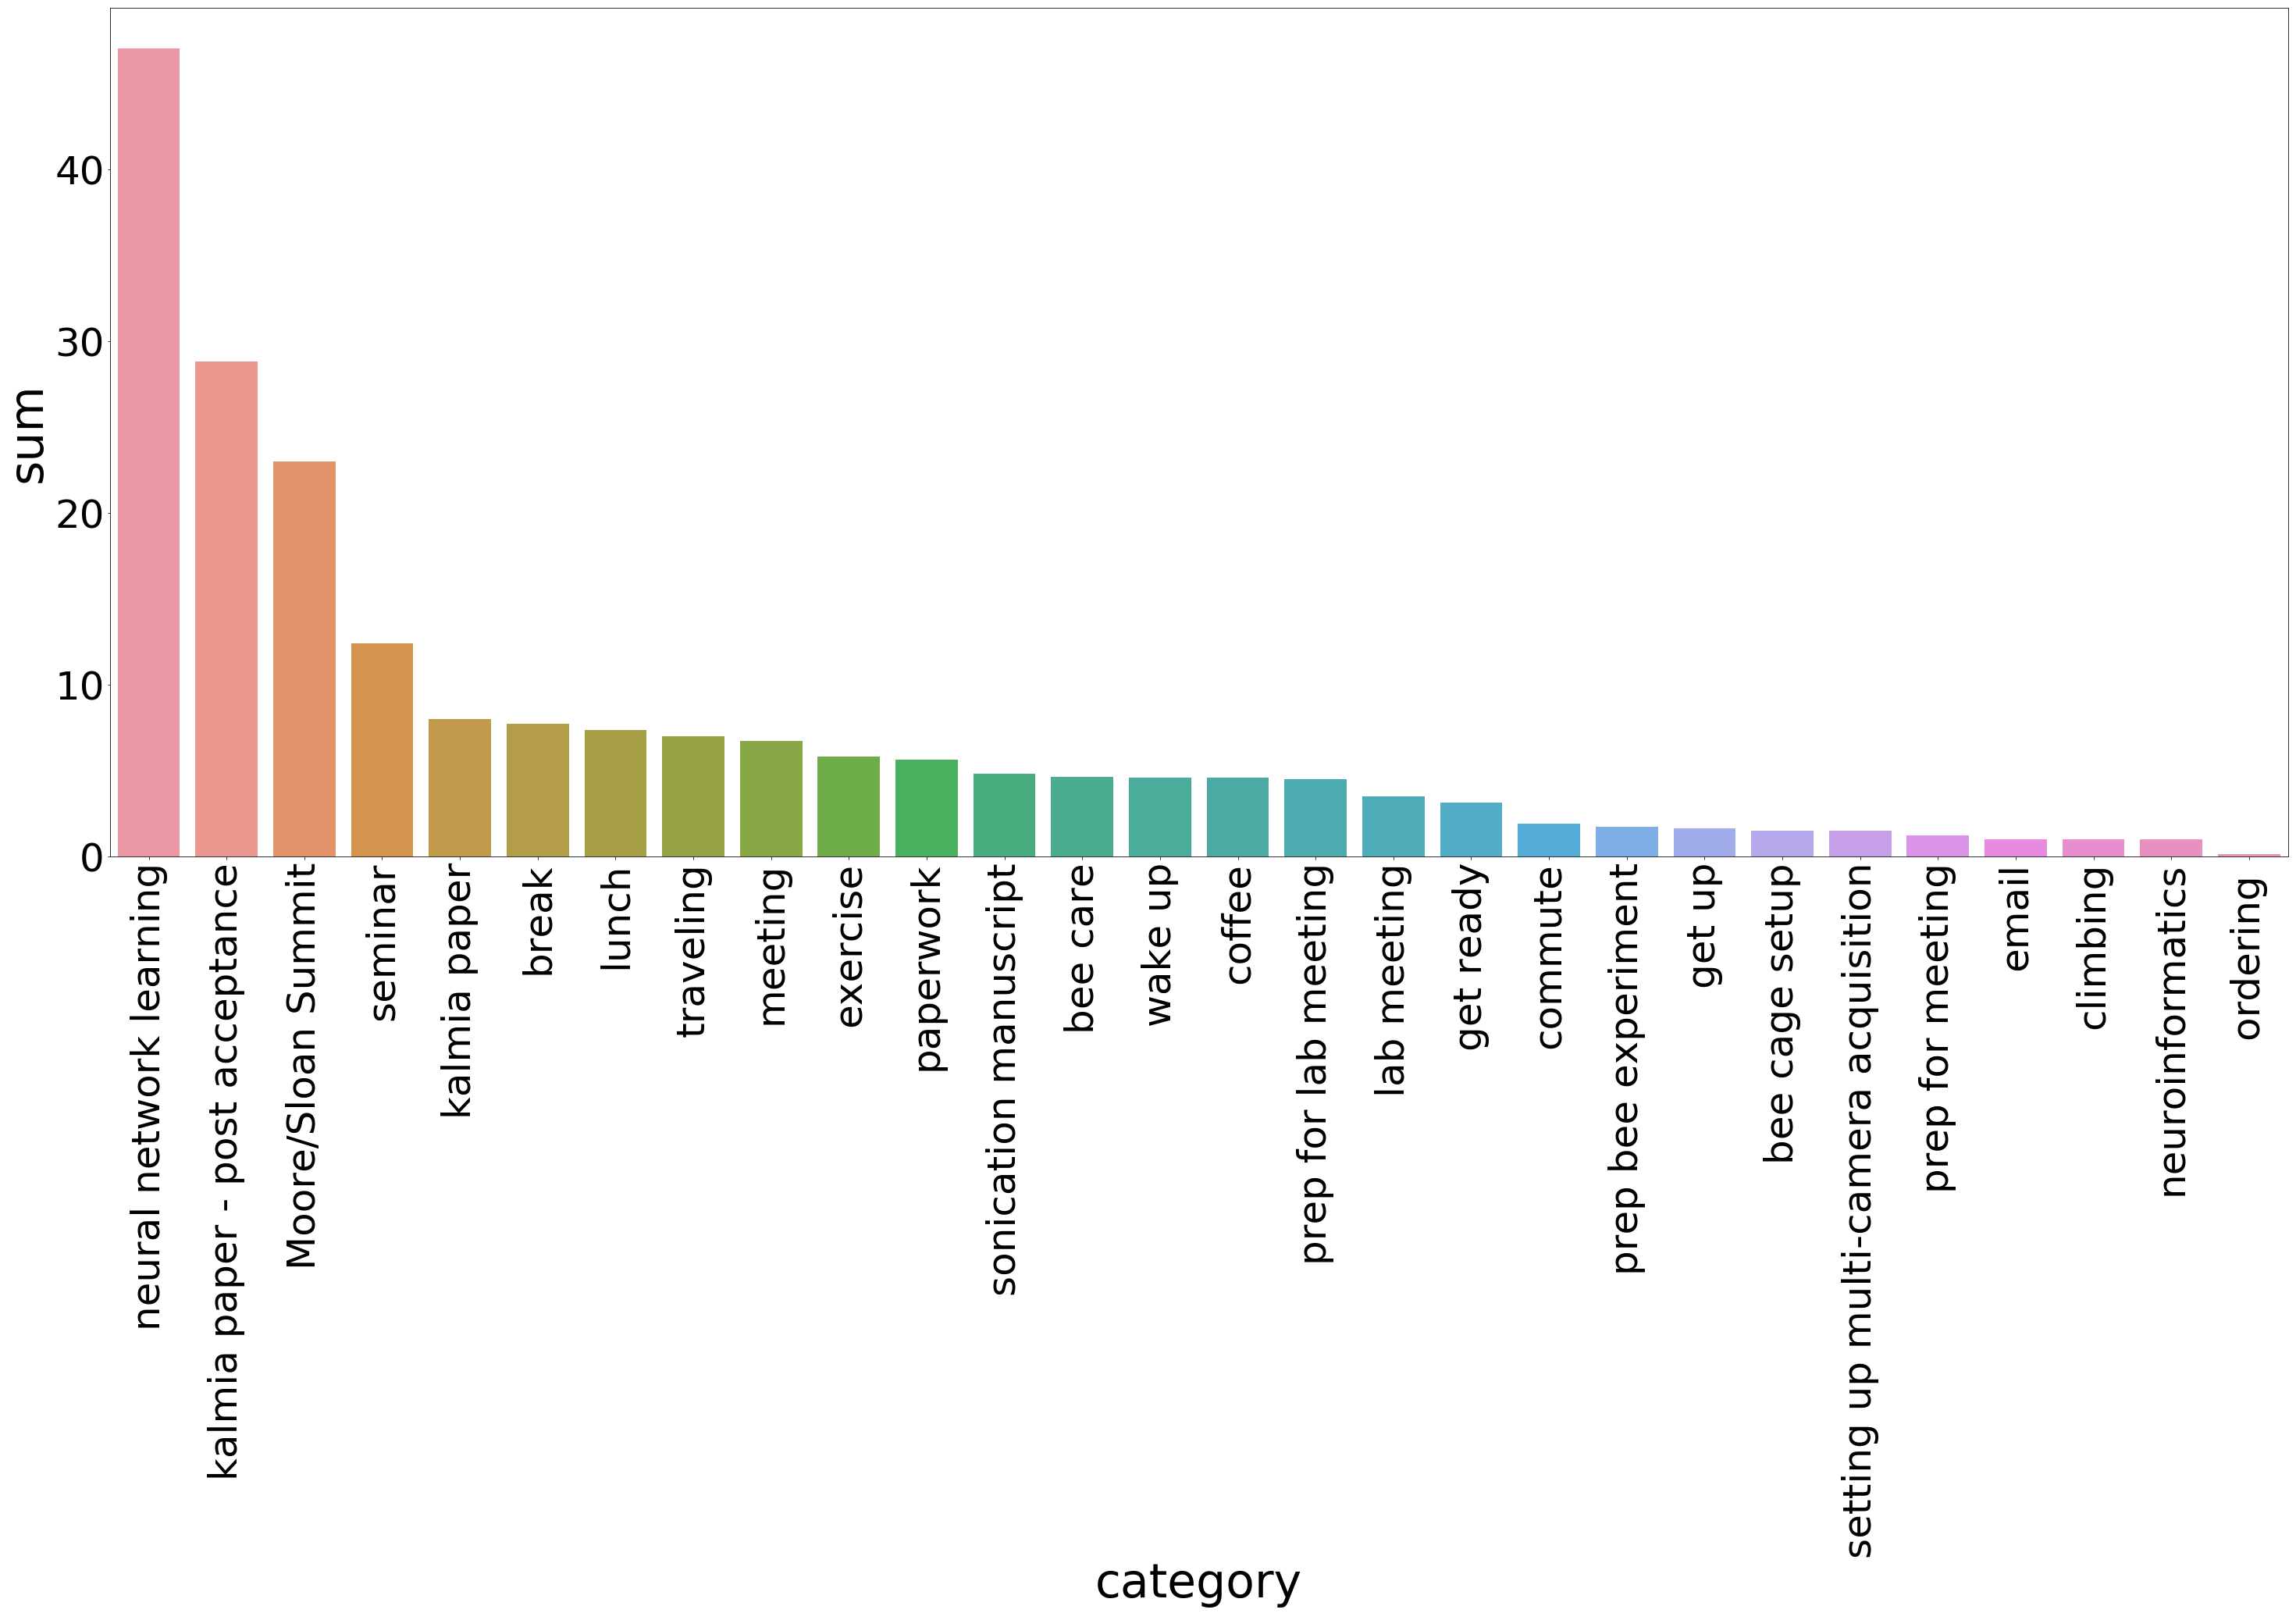

In [28]:
plt.figure(figsize=(50, 20))
plt.tick_params(axis='both', which='major', labelsize=50)
plt.xlabel('Activity', fontsize = 60)
plt.ylabel('Hours', fontsize = 60)
sns.barplot(g2["category"], g2["sum"])
plt.xticks(rotation="vertical")
plt.show()

In [29]:
g2

,category,sum
0,neural network learning,47.033333
1,kalmia paper - post acceptance,28.833333
2,Moore/Sloan Summit,23.000000
3,seminar,12.416667
4,kalmia paper,8.000000
5,break,7.750000
6,lunch,7.350000
7,traveling,7.000000
8,meeting,6.750000
9,exercise,5.833333


In [30]:
nonWorkActivities = ["bike", "snooze", "exercise", "commute", "climbing", "wake up", "get ready", "coffee", "break", "lunch", "get up"]

rowRemove = [g2.category[ii] not in nonWorkActivities for ii in range(len(g2))]


In [31]:
g3 = g2[rowRemove]

In [32]:
g3["sum"].sum()/len(np.unique(timeCalcs.day))

8.218333333333334

In [33]:
len(timeCalcs)

125

In [34]:
# calculate hours for each day
rowRemove = [timeCalcs.category[ii] not in nonWorkActivities for ii in timeCalcs.index]

timecalcs2 =  timeCalcs[rowRemove]

dailyHours= timecalcs2.groupby("day")['timeSpent'].sum().reset_index(name='sum')
dailyHours.sort_values("sum")

,day,sum
7,20 Nov 2017,5.333333
9,22 Nov 2017,5.500000
8,21 Nov 2017,5.500000
6,2 Nov 2017,5.666667
19,9 Nov 2017,6.650000
14,30 Nov 2017,7.500000
0,1 Nov 2017,7.500000
12,29 Nov 2017,8.000000
3,15 Nov 2017,8.250000
13,3 Nov 2017,8.500000


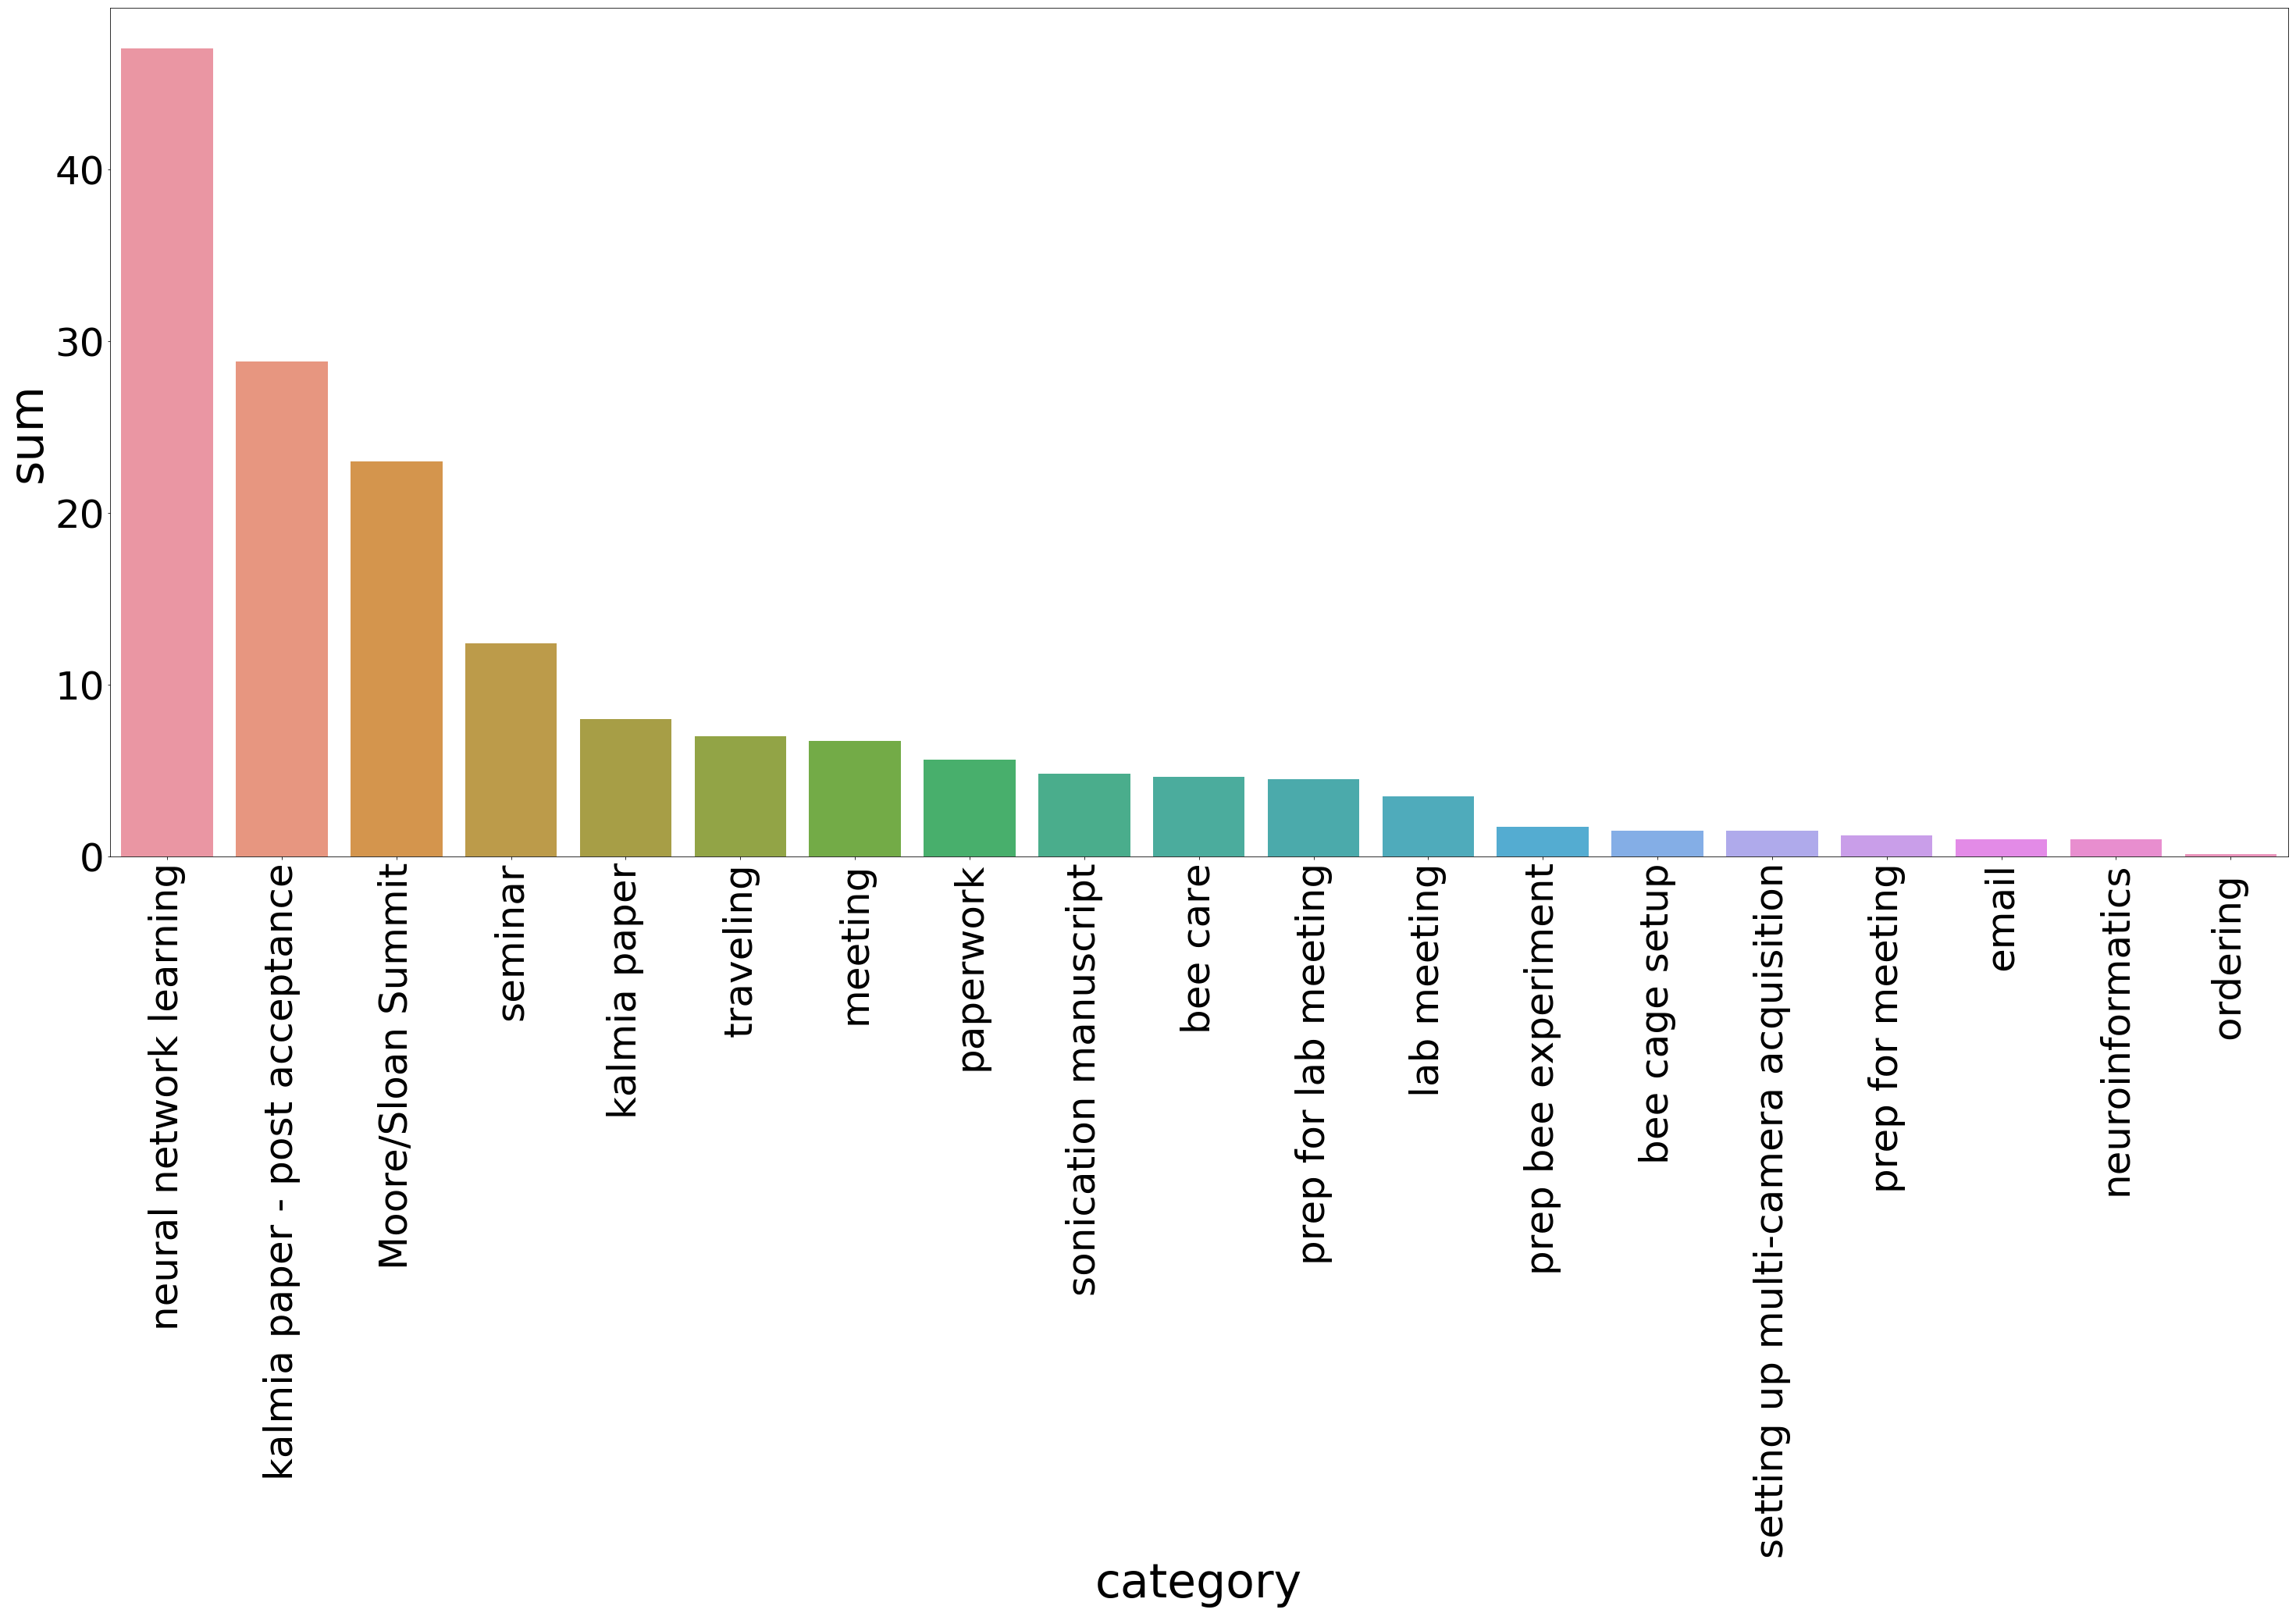

In [37]:
plt.figure(figsize=(50, 20))
plt.tick_params(axis='both', which='major', labelsize=50)
plt.xlabel('Activity', fontsize = 60)
plt.ylabel('Hours', fontsize = 60)
sns.barplot(g3["category"], g3["sum"])
plt.xticks(rotation="vertical")
plt.show()

In [38]:
g4 = g3.loc[g3["sum"] > 1.0,:]

In [39]:
g4

,category,sum
0,neural network learning,47.033333
1,kalmia paper - post acceptance,28.833333
2,Moore/Sloan Summit,23.000000
3,seminar,12.416667
4,kalmia paper,8.000000
7,traveling,7.000000
8,meeting,6.750000
10,paperwork,5.666667
11,sonication manuscript,4.833333
12,bee care,4.666667


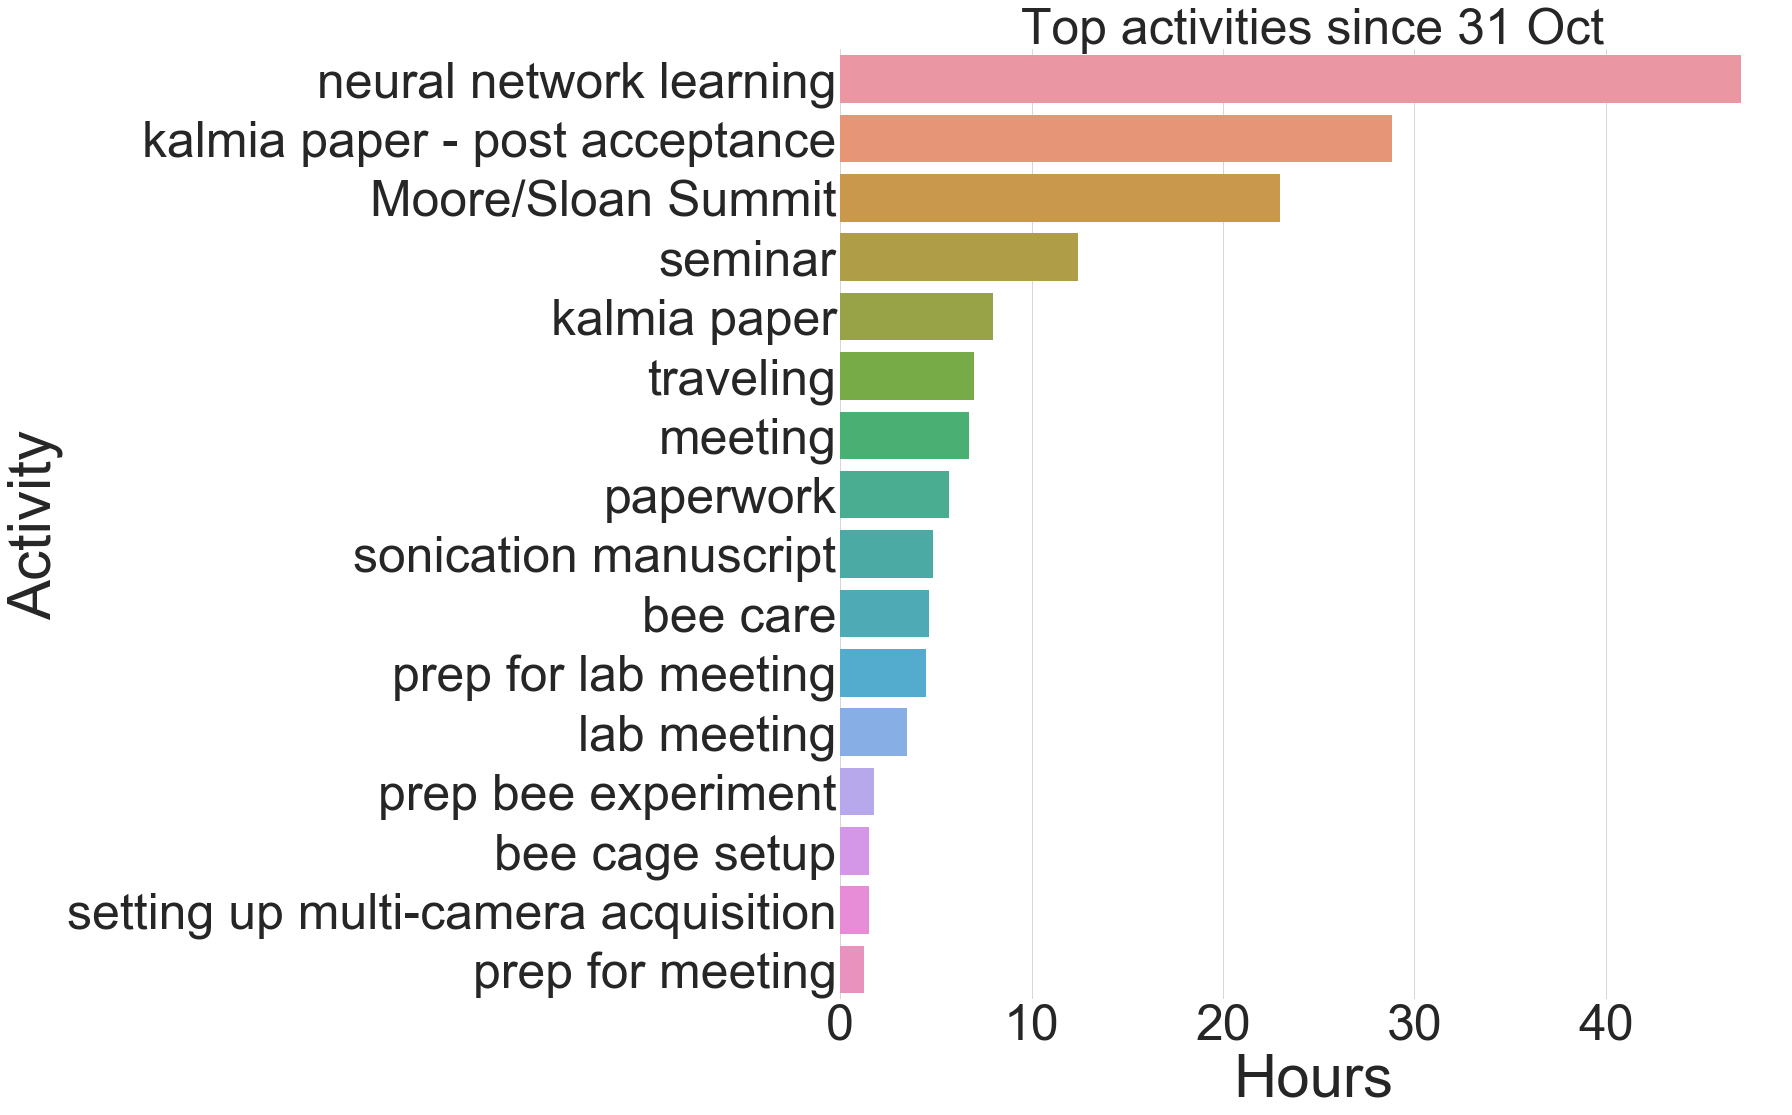

In [66]:
sns.set_style("whitegrid")
plt.figure(figsize=(25, 15))
plt.tick_params(axis='both', which='major', labelsize=50)
plt.xlabel('Activity', fontsize = 60)
plt.ylabel('Hours', fontsize = 60)
sns.barplot(g4["sum"], g4["category"])
plt.xticks(rotation="horizontal")
plt.ylabel("Activity")
plt.xlabel("Hours")
plt.tight_layout()
plt.title("Top activities since 31 Oct", fontsize=50)
plt.savefig("/Users/cswitzer/Dropbox/CallinStuff/weeklyMeetings/TimeSince31Oct.pdf", bbox_inches = 'tight')
sns.despine(left=True, bottom=True)
plt.show()

In [198]:
np.sum(g4["sum"])

160.95000000000002